## Transformer架构

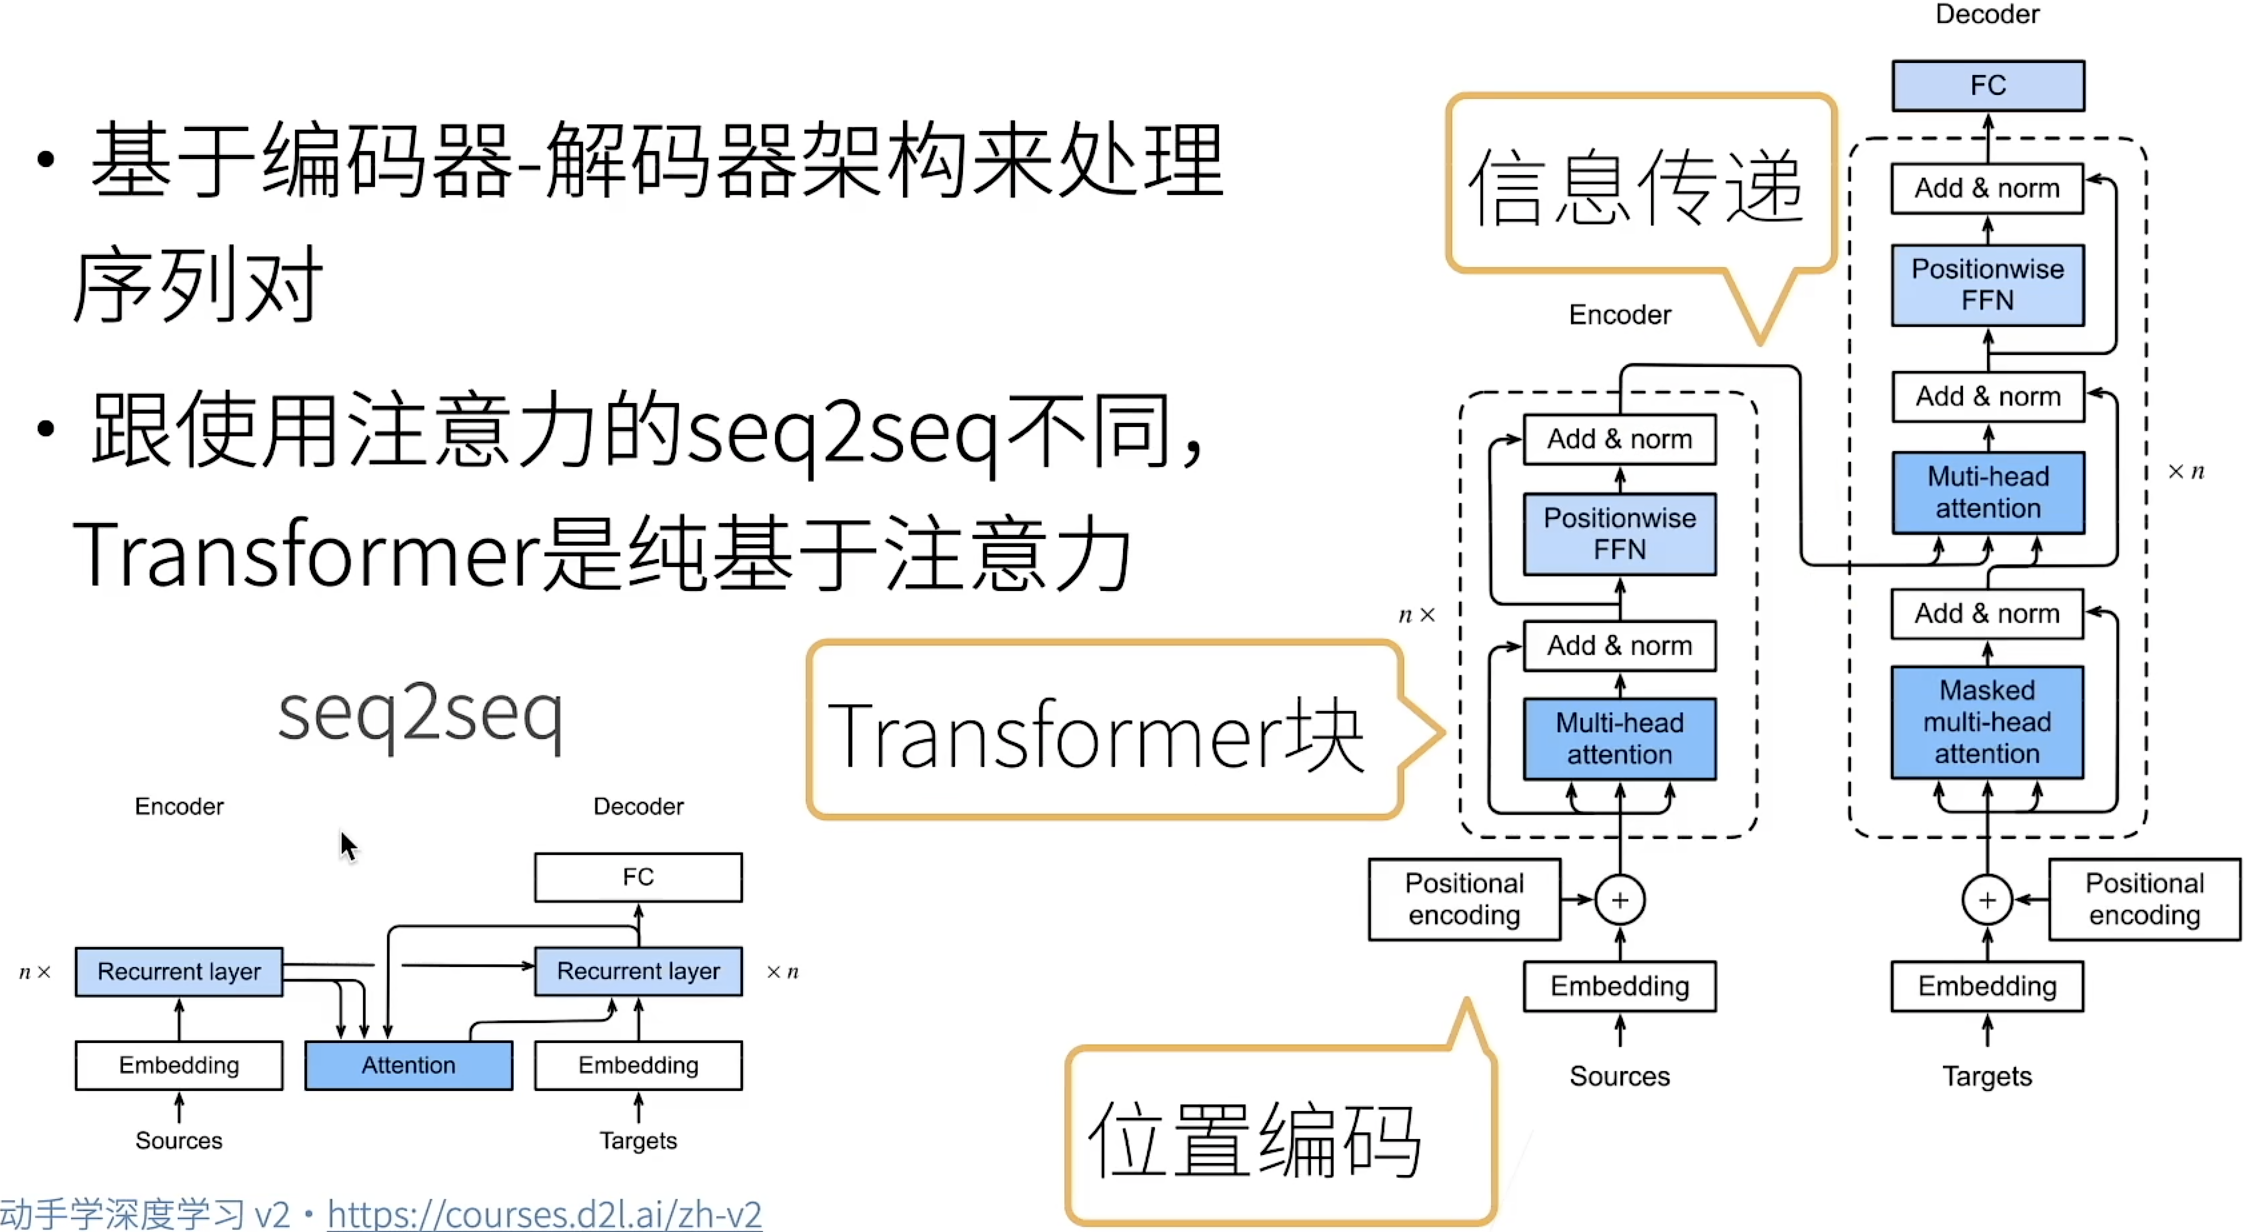


## 多头注意力

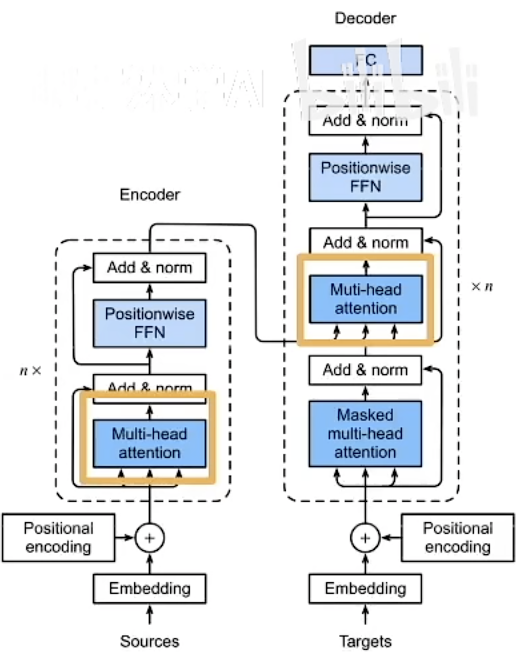

- 多同一个key，value，query，希望抽取不同的信息
    - 例如短距离关系和长距离关系
- 多头注意力使用$h$个独立的注意力池化层
    - 合并各个头(head)输出得到最终输出

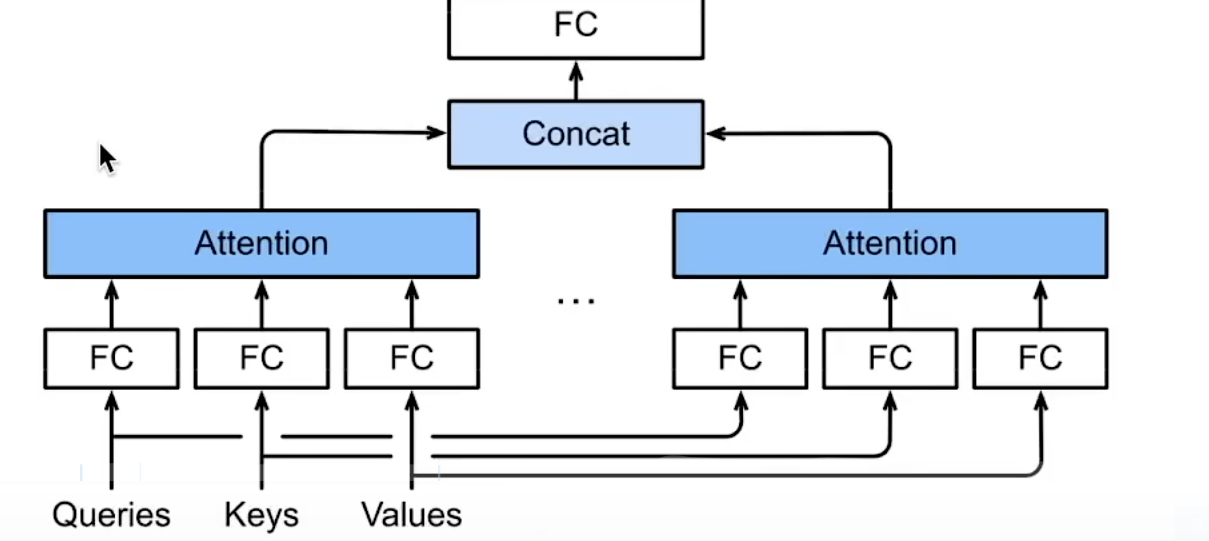


## 多头注意力计算

- query $\pmb q \in \mathbb R^{d_q}$, key $\pmb k \in \mathbb R^{d_k}$, value $\pmb v \in \mathbb R^{d_v}$
- 头$i$的可学习参数$\pmb W_i^{(q)} \in \mathbb R^{p_q \times d_q}$, $\pmb W_i^{(k)} \in \mathbb R^{p_k \times d_k}$, $\pmb W_i^{(v)} \in \mathbb R^{p_v \times d_v}$
- 头$i$的输出$\pmb h_i = f(\pmb W_i^{(q)} \pmb q, \pmb W_i^{(k)} \pmb k, \pmb W_i^{(v)} \pmb v) \in \mathbb R^{p_v}$
- 输出的可学习参数 $\pmb W_o \in \mathbb R^{p_o \times hp_v}$
- 多头注意力的输出
$$
\pmb W_o =  \left[ \begin{matrix} \pmb h_1 \\ ... \\ \pmb h_h \end{matrix} \right] \in \mathbb R^{p_o}
$$

## 有掩码的多头注意力

- 解码器对序列中的一个元素输出时，不应该考虑该元素之后的元素
- 可以通过掩码来实现
    - 也就是计算$\pmb x_i$输出是，假装当前序列长度为$i$
    
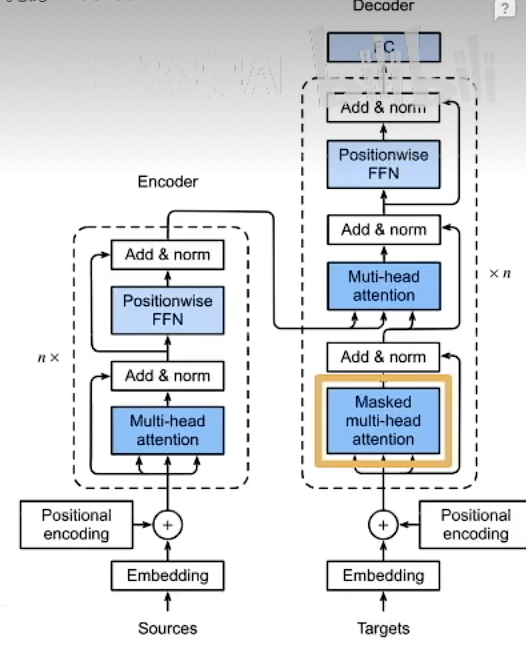

## 基于位置的前馈网络

- 将输入形状由$(b, n, d)$变换成$(bn, d)$
- 作用两个全连接层
- 输出形状由$(bn, d)$变化回$(b, n, d)$
- 等价于两层核窗口为1的一维卷积层

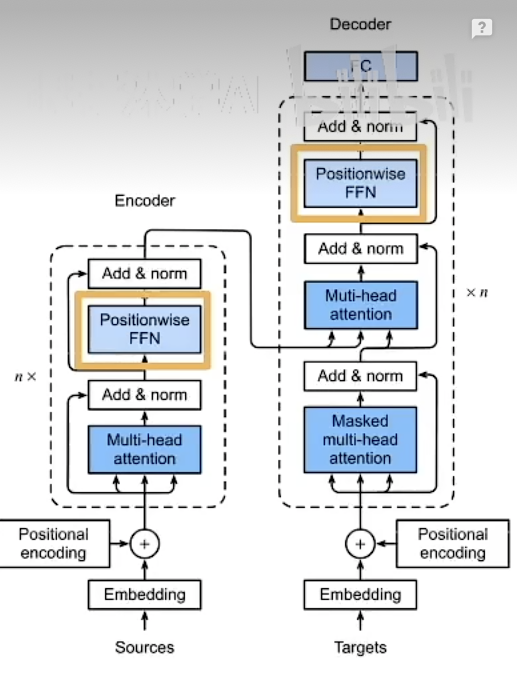

## 层归一化

- 批量归一化（Batch normalization）对每个特征/通道里的元素进行归一化
    - 不适合序列长度会变的NLP应用
- 层归一化（Layer normalization）对每个样本里的元素进行归一化

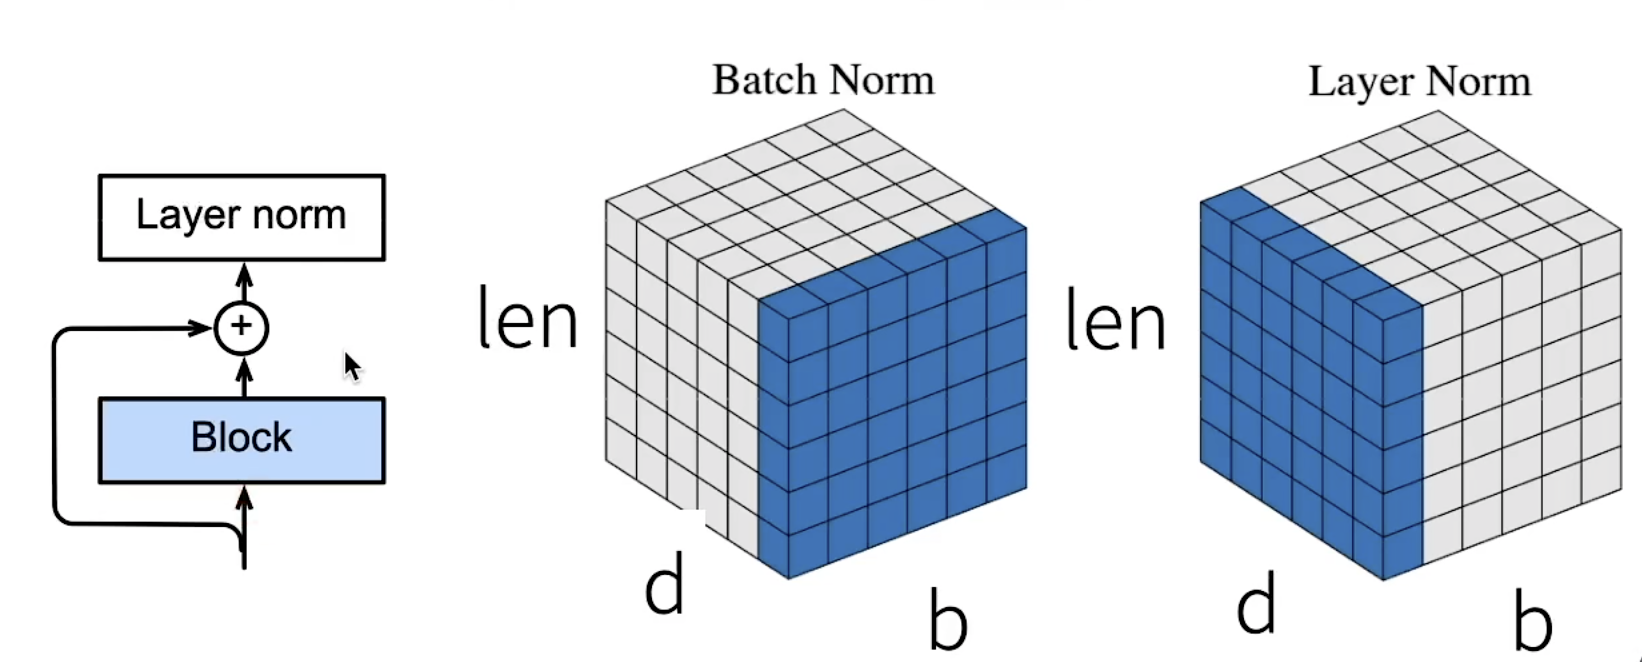


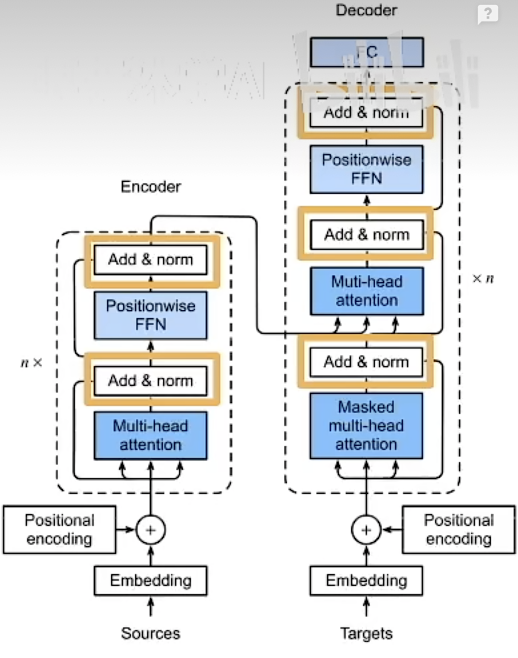

## 信息传递

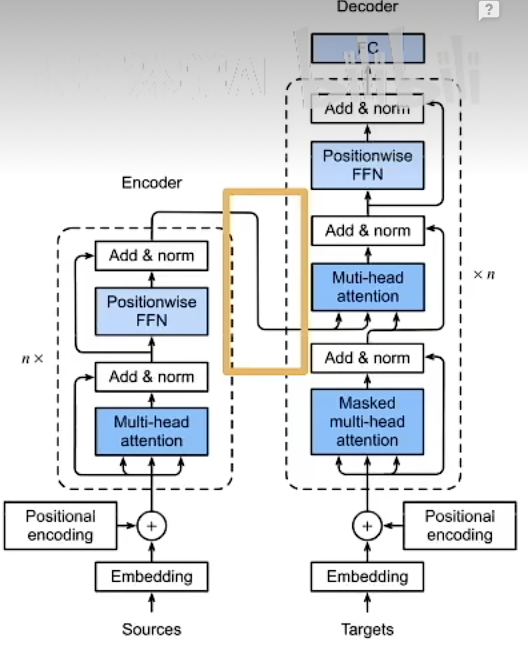

- 编码器中的输出$\pmb y_1, ..., \pmb y_n$
- 将其作为解码器中第$i$个Transformer块中多头注意力的key和value
    - 它的query来自目标序列
- 意味着编码器和解码器中块的个数和输出维度都是一样的

## 预测

- 预测第$t + 1$个输出时
- 解码器中输入前$t$个预测值
    - 在自注意力中，前$t$个预测值作为key和value，第$t$个预测值还作为$query$
 
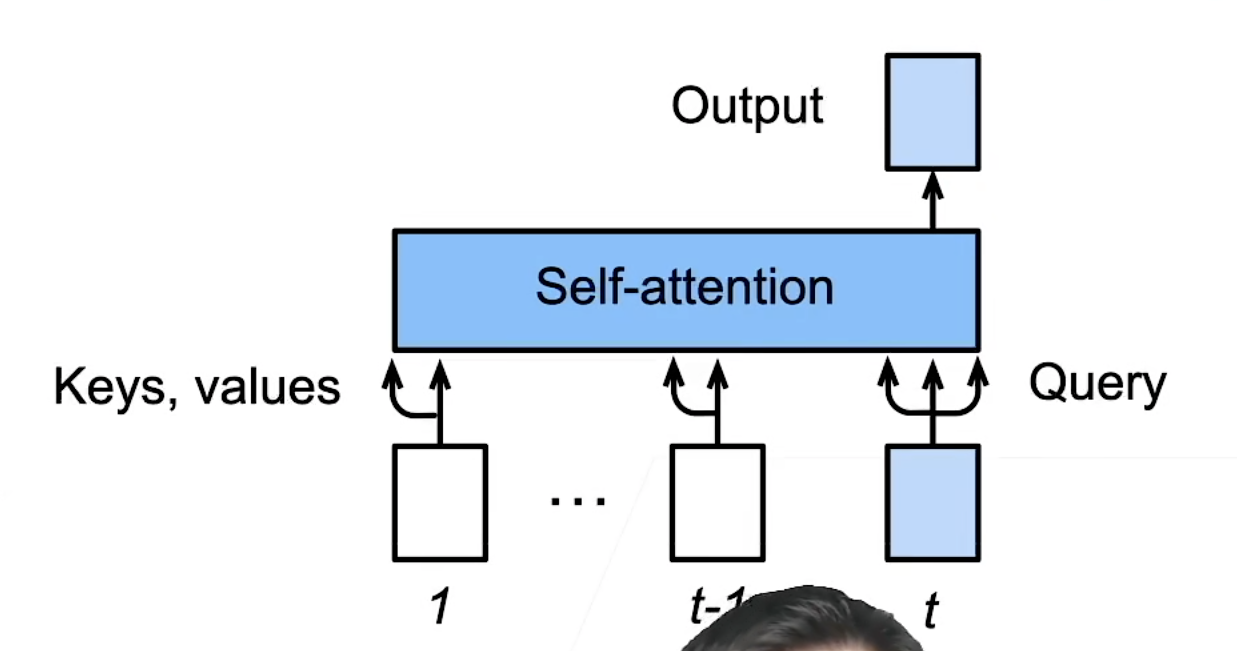

## 总结
- Transformer是一个纯使用注意力的编码器-解码器
- 编码器和解码器都有n个Transformer块
- 每个块里使用多头（自）注意力，基于位置的前馈网络，和层归一化